In [1]:
# Load libraries
import numpy as np
import scipy.special

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA

from bokeh.plotting import figure,output_notebook, show
from bokeh.layouts import gridplot,column, row
from bokeh.models import ColumnDataSource,ColorBar,Plot, VBar,Grid, LinearAxis
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10

# Data Preprocessing

In [2]:
# Load data
iris = datasets.load_iris()
features = iris.data
print(features[:10],features.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]] (150, 4)


In [11]:
features[:,0].std()

0.8253012917851409

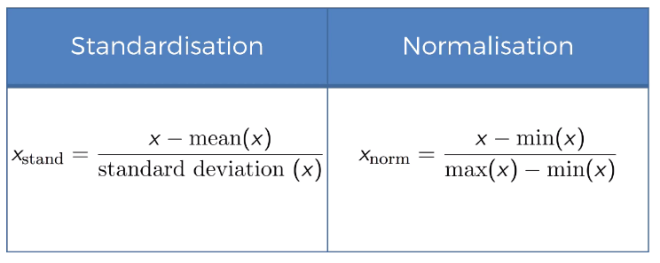

### Standard Scaling
* StandardScaler follows the standard normal distribution, making the mean of the scaled data 0 and scaling the data to unit variance. It is useful when the data has a Gaussian distribution or when the algorithm requires features to be standardized. It is recommended for normally distributed data.
### Min-Max Scaling
* MinMaxScaler scales the data to a fixed range, typically between 0 and 1. It is useful when the algorithm requires data to be on a similar scale and when dealing with non-Gaussian distributions or when the pixel values are typically in the range of 0-255. It ensures that the values are within a fixed range and is suitable for non-Gaussian distributions such as a power-law distribution

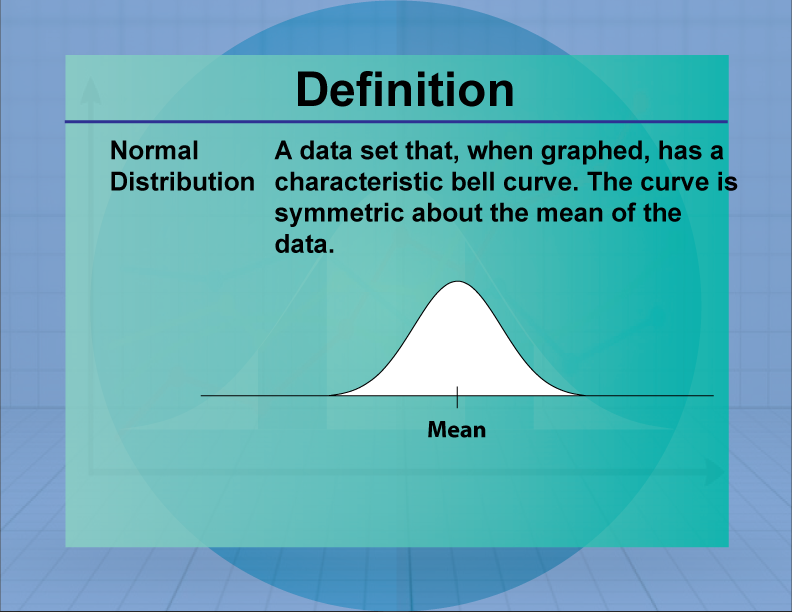

In [12]:
output_notebook()

Loading BokehJS ...

In [ ]:
# all in on single diagriam
# p = figure(title="Distribution Plot")
# colors = ["navy", "firebrick", "olive", "purple", "orange"]
# for i, (hist, edges) in enumerate(hists):
#     p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color=colors[i], line_color="white")
# show(p)

In [13]:
# Split the 2D array column-wise
list_of_vectors = np.hsplit(features, features.shape[1])

In [14]:
# Create a list to store the histograms
hists = []
# Create a histogram for each vector
for vector in list_of_vectors:
    hist, edges = np.histogram(vector, density=True, bins=50)
    hists.append((hist, edges))
# In different diagrams
# Create the Bokeh plots
plots = []
colors = ["navy", "firebrick", "olive", "purple", "orange"]
for i, (hist, edges) in enumerate(hists):
    p = figure(title="Distribution Plot {}".format(i+1))
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color=colors[i], line_color="white")
    plots.append(p)

# Create a grid of plots
grid = gridplot([[plots[0], plots[1]], [plots[2], plots[3]]],width=550, height=550)

# Show the grid of plots
show(grid)

In [3]:
# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)
features_std[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [18]:
features_std[:,0].min()

-1.87002413384702

In [19]:
# Split the 2D array column-wise
list_of_vectors = np.hsplit(features_std, features_std.shape[1])
# Create a list to store the histograms
hists = []
# Create a histogram for each vector
for vector in list_of_vectors:
    hist, edges = np.histogram(vector, density=True, bins=50)
    hists.append((hist, edges))
# In different diagrams
# Create the Bokeh plots
plots = []
colors = ["navy", "firebrick", "olive", "purple", "orange"]
for i, (hist, edges) in enumerate(hists):
    p = figure(title="Distribution Plot {}".format(i+1))
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color=colors[i], line_color="white")
    plots.append(p)

# Create a grid of plots
grid = gridplot([[plots[0], plots[1]], [plots[2], plots[3]]],width=550, height=550)

# Show the grid of plots
show(grid)

# Kmeans Clustering

In [11]:
%time
# Create k-means object
cluster = KMeans(n_clusters=3, random_state=0, n_init="auto")
# Train model
kmeans = cluster.fit(features_std)

CPU times: total: 0 ns
Wall time: 0 ns


In [12]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [23]:
kmeans.cluster_centers_

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

In [95]:
# Add cluster labels to your data
# data_with_labels = np.column_stack((features_std, kmeans.labels_))

In [101]:
data_2d[:10]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356]])

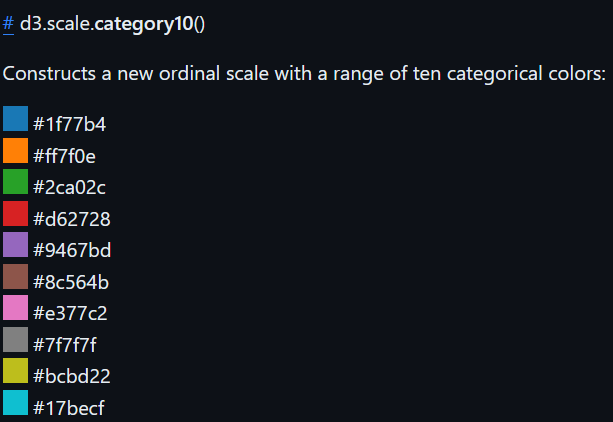

In [24]:
# Calculate label frequencies
label_values, label_counts = np.unique(kmeans.labels_, return_counts=True)

In [25]:
label_values

array([0, 1, 2])

In [26]:
label_counts

array([53, 50, 47], dtype=int64)

In [27]:
Category10[3]

('#1f77b4', '#ff7f0e', '#2ca02c')

In [28]:
source = ColumnDataSource(dict(x=label_values.tolist(), top=label_counts.tolist(),colors=Category10[3]))
# Create a Bokeh plot for the label distribution
plot = Plot(
    title=None, width=300, height=300,
    min_border=0, toolbar_location=None)

glyph = VBar(x="x", top="top", bottom=0, width=0.5, fill_color="colors")
plot.add_glyph(source, glyph)


xaxis = LinearAxis()
plot.add_layout(xaxis, 'below')

yaxis = LinearAxis()
plot.add_layout(yaxis, 'left')

plot.add_layout(Grid(dimension=0, ticker=xaxis.ticker))
plot.add_layout(Grid(dimension=1, ticker=yaxis.ticker))
show(plot)

In [29]:
# Convert cluster labels to strings
cluster_labels_str = [str(label) for label in kmeans.labels_]
cluster_labels_str[:10]

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

In [30]:
# Reduce dimensionality using PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(features_std)

In [31]:
# Create a Bokeh ColumnDataSource
source = ColumnDataSource(data=dict(x=data_2d[:, 0], y=data_2d[:, 1], color=cluster_labels_str))

# Create a scatter plot with factor_cmap for color mapping
plot = figure(title="KMeans Clustering with PCA", x_axis_label='Principal Component 1', 
              y_axis_label='Principal Component 2', width=800, height=600)
plot.scatter(x='x', y='y', size=8, color=factor_cmap('color', palette=Category10[3], factors=["0","1","2"]), source=source)
# Show the plot
show(plot)

In [8]:
%time
# Create k-mean object
cluster = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100,n_init="auto")
# Train model
model = cluster.fit(features_std)

CPU times: total: 0 ns
Wall time: 0 ns


In [13]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [14]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])